In [1]:
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

#### Hypothesis Testing for Stroop Effect

##### Introduction 

The goal of this project is to use descriptive statistics and a statistical test to analyze the Stroop effect, a classic result of experimental psychology. The Stroop effect is a demonstration of interference in the reaction time of a task. In the Stroop task, people simply look at color words, such as blue, red, or green. The task is to name the color of the ink the words are printed in, while fully ignoring the actual word meaning. For instance, it is very easy to name the color of the word "black" when it is printed in black (most text is written in black ink). It is also very easy to name the color of the word "red" printed in red ink color. It is difficult, though, when the word and the ink color are different.  This extent of this difficulty is what we call the Stroop effect. The Stroop effect is the degree of difficulty people have with naming the color of the ink rather than the word itself. In Stroop’s words, there is "interference" between the color of the ink and the word meaning and as a result, it is hypotheized that the resultant response will be slower. 
<br>
<br>
In this experiment, researchers give two lists of 25 words to the same subjects. One set contains only  congruent words (i.e the ink color and the word refer to the same color) and the other set contains incongruent words (i.e the ink color and the word possibly refer to different colors.) The researchers then note the time in seconds required to read off each of the lists. Thus the dependent variable in this experiment is the total time taken to complete the task. Independent variable is dichotomous and its levels are paired (congruent/ incongruent). 
<br>
<br>
The goal of this project is to perform an appropriate statistical test on a sample of participants, who went through the Stroop effect experiment and had their reaction time recorded under both conditions. Ultimately, the test results will predict the outcome of the entire population of participants who perform the same tasks based on the results of the statistical test and therefore deciding if the Stroop effect indeed interferes with people’s reaction time of a task.
<br>
<br>
##### Questions for Investigation

1) *What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.*
<br>
<br>
We will use the dependent t-test (also called the paired t-test or paired-samples t-test) which compares the means of two related groups to determine whether there is a statistically significant difference between these means. Since, the variance of the population is unknown, we use a t-test. We use a dependent t-test since we are testing a "difference" in means between two related groups. One of the key assumptions is that the distribution of the differences between the scores of the two related groups needs to be normally distributed. 
<br>
<br>
An appropriate set of hypothesis for this task would be 
$$H_0 : \mu_{c} = \mu_{ic}$$ and 
$$H_a: \mu_{c} < \mu_{ic}$$

The null hypothesis $(H_0)$ is that the mean of the population reaction time of the task under the incongruent words condition is not significantly different than that of the congruent words condition. The alternative hypothesis $(H_a)$ is that the mean of the population reaction time of the task under the incongruent words condition is significantly longer than that of the congruent words condition.
<br>
<br>
The datset for this experiment can be found [here](https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view). Let us load the data in to a pandas dataframe and view it.   Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task. Note that the number of samples $n$ is small. ($n<30)$

In [2]:
import pandas as pd
data = pd.read_csv('./stroopdata.csv')

In [3]:
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


We will use dependent t-test.  The dependent t-test (also called the paired t-test or paired-samples t-test) compares the means of two related groups to determine whether there is a statistically significant difference between these means. This is an example of pre-test/ post-test. One assumption is that the distribution of the differences between the scores of the two related groups needs to be normally distributed.
<br>
<br>

Dependent variable is the total time taken to complete the task. Independent variable is dichotomous and its levels are paired (congruent/ incongruent).
<br>
<br>

2) *Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.*

In [4]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


As shown by the outputs above, the average times of the 24 participants performing the task under the congruent words condition and the incongruent words condition are $\bar{x}_c=14.05113s$ and $\bar{x}_i=22.01592s$ respectively. The sample standard deviations of the two conditions are $s_c = 3.559358$ and $s_i = 4.797057.$ The difference between the two average times is $x_d =-7.964792s$, and the standard deviation of the difference between two conditions in time is $s_d=4.864827.$

3) *Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.*

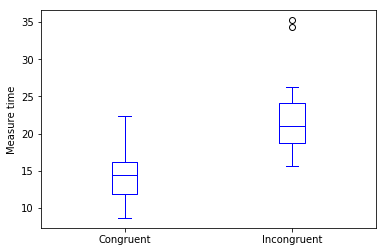

In [5]:
import matplotlib.pyplot as plt
data.plot.box(color='blue')
plt.style.use('ggplot')
plt.ylabel('Measure time')
plt.show()

Based on the boxplot above, the reaction time under incongruent words condition appears to be longer than that of the congruent words condition, which is consistent with the sample statistics generated earlier.
<br>
<br>
Let us now visualize the distribution of the difference in reaction times. We can use Kernel Density Estimation (KDE), a non-parametric way for visualizing the distribution of the underlying variable. We observe that the distribution of the difference does not look normal, (one of the assumptions of the paired sample t-test is that the sample difference must be normally distributed, though the dependent t-test is robust to violations of normality.)

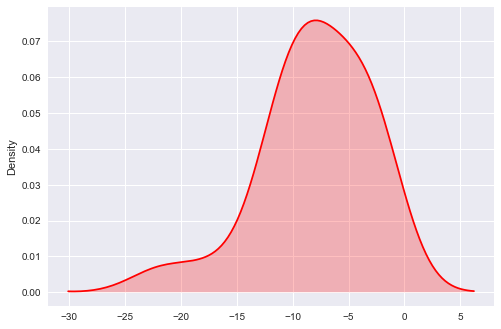

In [6]:
import seaborn as sns
diff = data.Congruent - data.Incongruent
sns.kdeplot(diff, shade=True, color='r')
plt.ylabel('Density')
plt.show()

4) *Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?*
<br>
<br>
Choose confidence level as $99\%$ i.e level of significance $\alpha = 0.01$. 
<br>
<br>
Note that $df = 24 - 1 = 23$, and hence the critical value at this level of significance is $t^{*} = -2.50$. Note that the
t-statistic is defined as 
$$t = \frac{\bar{x}_c - \bar{x}_{ic}}{\frac{s_{d}}{\sqrt{n}}},$$ where $s_d$ denotes the standard deviation of the sample differences. 
<br>
<br>
Let us now compute the t-statistic. 

In [7]:
import math
se = diff.std()/ math.sqrt(len(diff))
t = diff.mean()/ se
t

-8.020706944109957

In [8]:
diff.mean() + 2.50*se

-5.482220079720815

Thus, an interval estimate for the 99% confidence interval for the population difference is $(-\infty, -5.4822)$.

#### Conclusion

Note that the t-statistic is -8.02 which is less than the critical t value -2.50. For this t-statistic, at $\alpha = 0.01$ level of significance with 23 degrees of freedom and one-tailed hypothesis, the p-value is less than .00001. (As can be calculated [here](http://www.socscistatistics.com/pvalues/tdistribution.aspx))
<br>
<br>
Hence we reject the null hypothesis $(H_0)$ in favor of the alternative hypothesis $(H_a)$ and conclude that the reaction time of participants under the incongruent words condition is significantly longer than that of the congruent words condition. This  matched up with my expectation as my own result of the Stroop effect experiment is consistent with the outcome of this test. In other words, the Stroop effect is real and considerably slows down reaction time of the participants.